In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%pip install -Uq notebook-as-pdf

In [2]:
df = pd.read_csv('Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Univariate Analysis


In [4]:
df = df.drop(columns=['CustomerID'])

In [5]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


Histogram to look at one of the column 



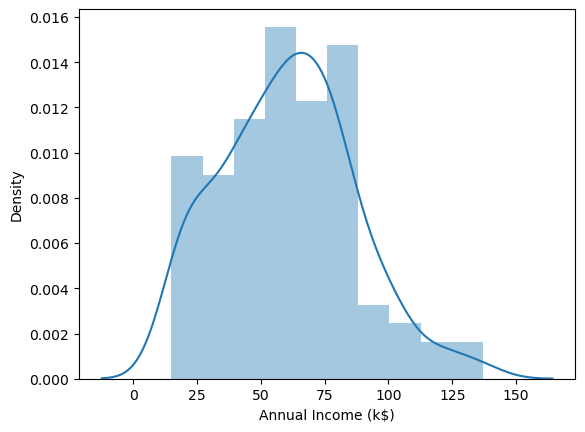

In [6]:
sns.distplot(df['Annual Income (k$)']);

In [7]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

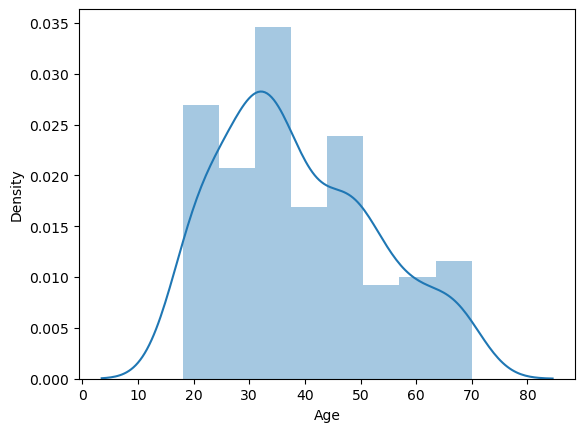

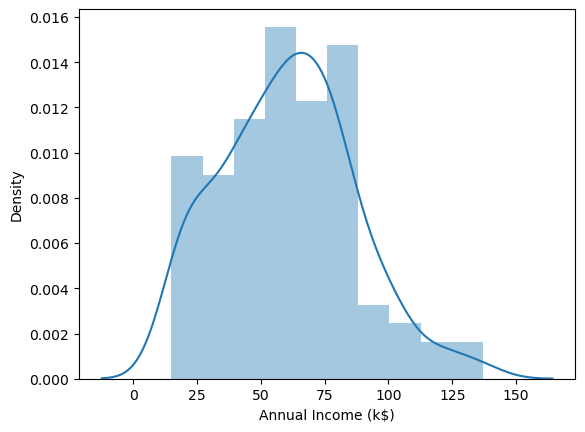

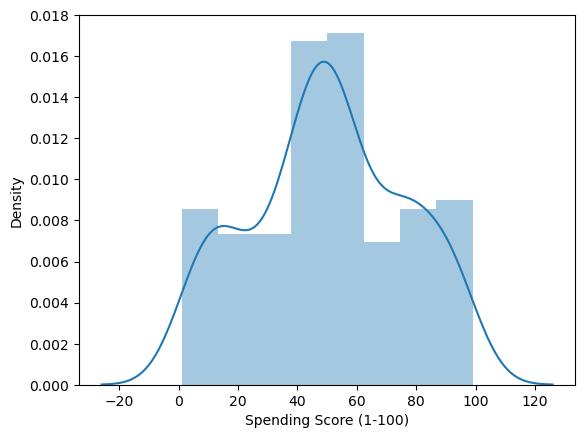

In [8]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.distplot(df[i])

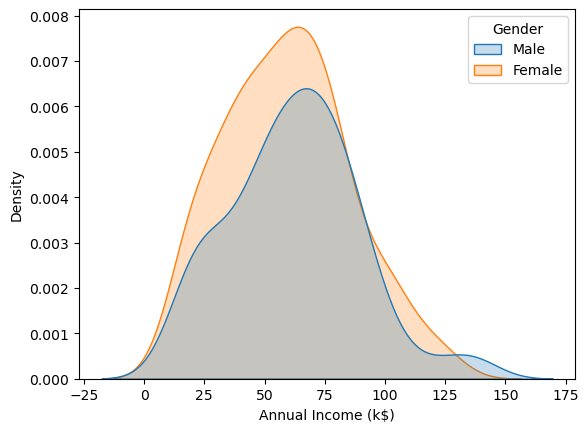

In [9]:
sns.kdeplot(data=df, x='Annual Income (k$)', hue='Gender', shade=True);


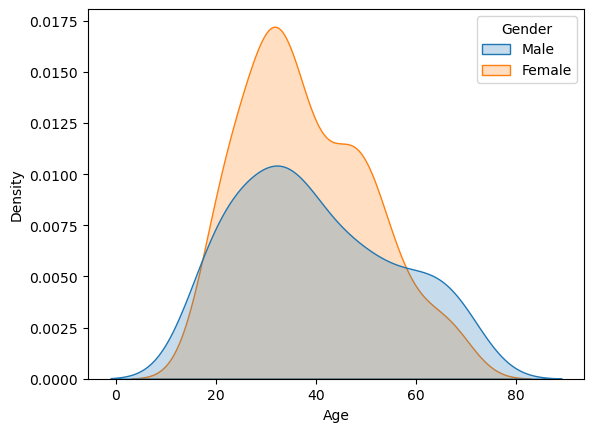

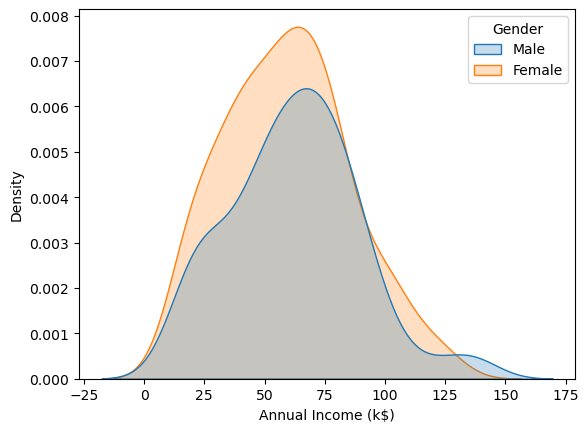

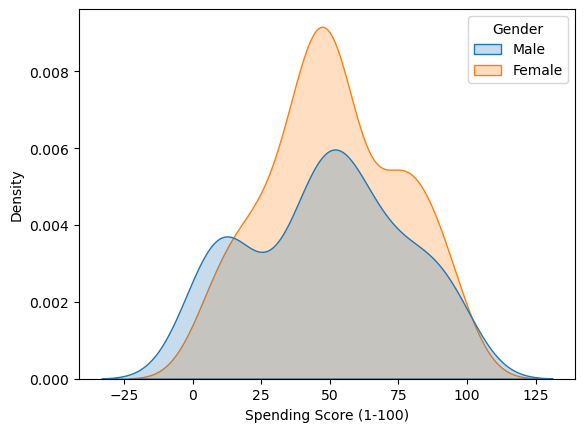

In [10]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.kdeplot(data=df,x=i, hue='Gender', shade=True);


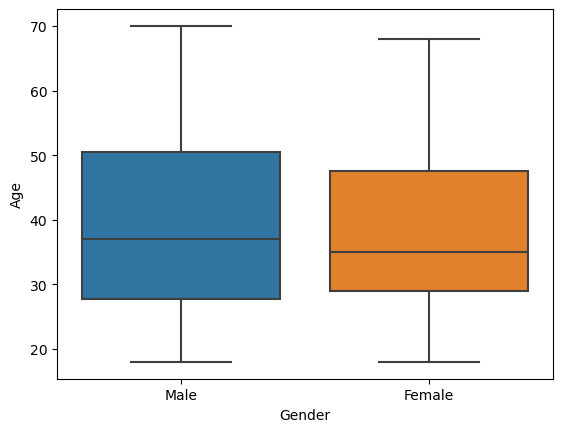

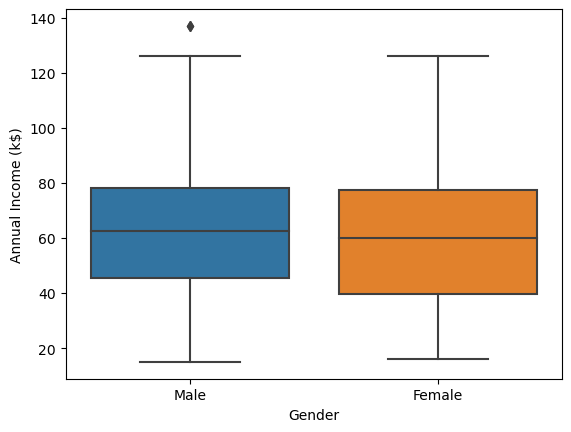

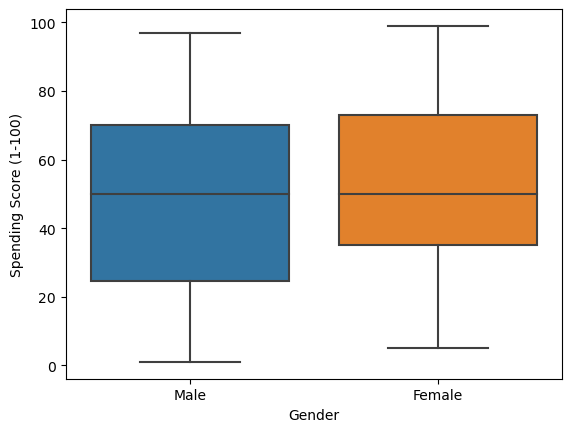

In [11]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.boxplot(data=df, x='Gender', y=i)

# Bivariate Analysis

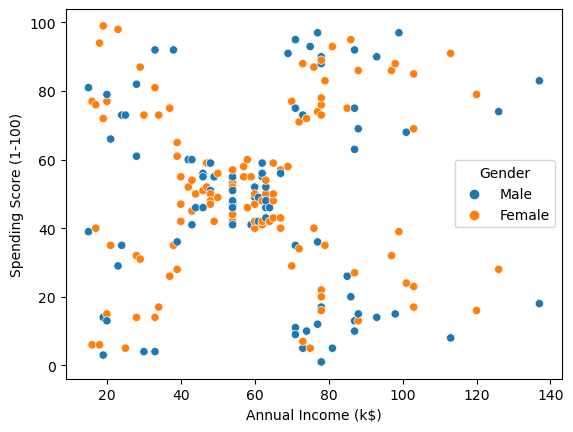

In [12]:
#import seaborn as sns

sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender');

In [13]:
df.groupby('Gender')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [14]:
corr_matrix = df.corr(numeric_only=True)
corr_matrix

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


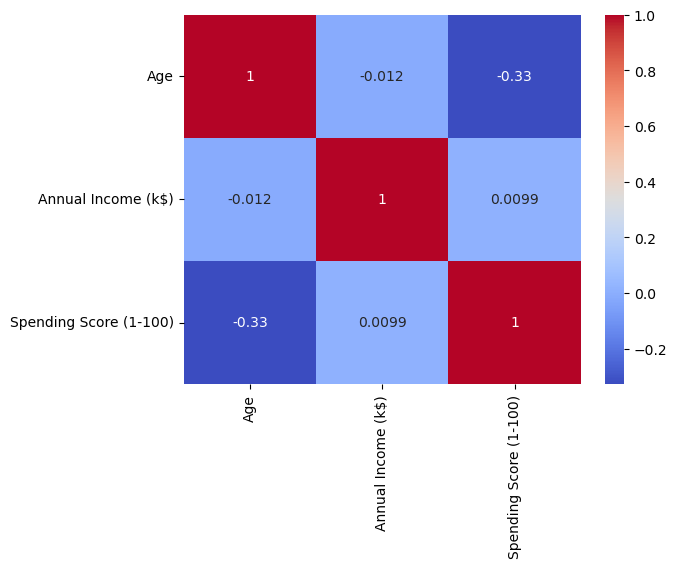

In [15]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm');

In [16]:
income_by_gender = df.groupby('Gender')['Annual Income (k$)'].agg(['mean', 'sum', 'count'])
print(income_by_gender)

             mean   sum  count
Gender                        
Female  59.250000  6636    112
Male    62.227273  5476     88


In [17]:
avg_age = df['Age'].mean()
avg_age

38.85

In [18]:
avg_income = df['Annual Income (k$)'].mean()

avg_income

60.56

In [19]:
df['Gender'].value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

In [20]:
df['Gender'].value_counts(normalize=True)

Gender
Female    0.56
Male      0.44
Name: proportion, dtype: float64

In [21]:
df['Gender'].value_counts(normalize=True).apply(lambda x: f'{x*100:.0f}%')


Gender
Female    56%
Male      44%
Name: proportion, dtype: object

In [22]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

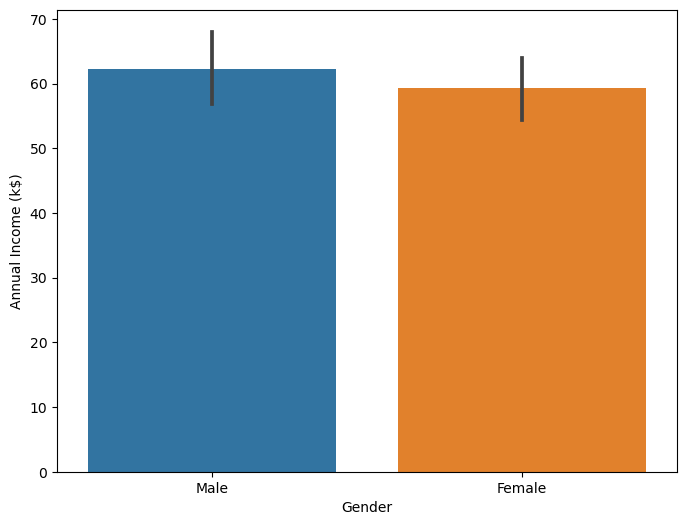

In [23]:
# Plotting
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='Gender', y='Annual Income (k$)');


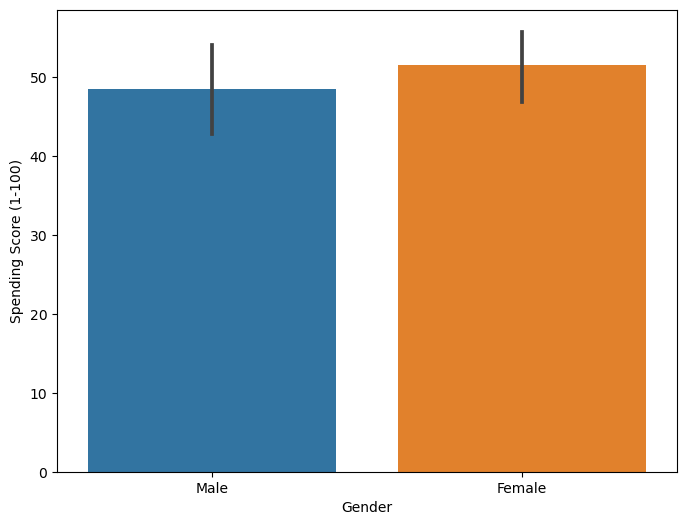

In [24]:
# Plotting
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='Gender', y='Spending Score (1-100)');
